<a href="https://colab.research.google.com/github/Gamearonx/EDA/blob/main/Kevi_CarPrice_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv("/content/drive/My Drive/EDA Assignment Files/Assignments/CarPrice_Assignment.csv")

In [98]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


DATA CONVERSION

In [99]:
def clean_car_data(filepath):
    df = pd.read_csv(filepath)

In [100]:
# Convert Data Types
df['symboling'] = df['symboling'].astype(int)
df['price'] = df['price'].astype(float)
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['fueltype'] = df['fueltype'].map({'gas': 0, 'diesel': 1})
df['aspiration'] = df['aspiration'].map({'std': 0, 'turbo': 1})
df['drivewheel'] = df['drivewheel'].astype('category').cat.codes

# Duplicates

In [101]:
duplicate_count = df.duplicated().sum()
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [102]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

# COLUMNS

In [103]:
# Drop Unwanted Columns
df.drop(columns=['car_ID'], inplace=True)

# Missing Values

In [104]:
df.dropna(inplace=True)

# Transformation

In [105]:
# Extract Car Brand
df['brand'] = df['CarName'].apply(lambda x: x.split()[0].lower())
df.drop(columns=['CarName'], inplace=True)

In [106]:
# Encode Categorical Variables
df = pd.get_dummies(df, columns=['carbody', 'enginetype', 'fuelsystem'], drop_first=True)

In [107]:
# Handle Outliers using IQR method on 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Analysis

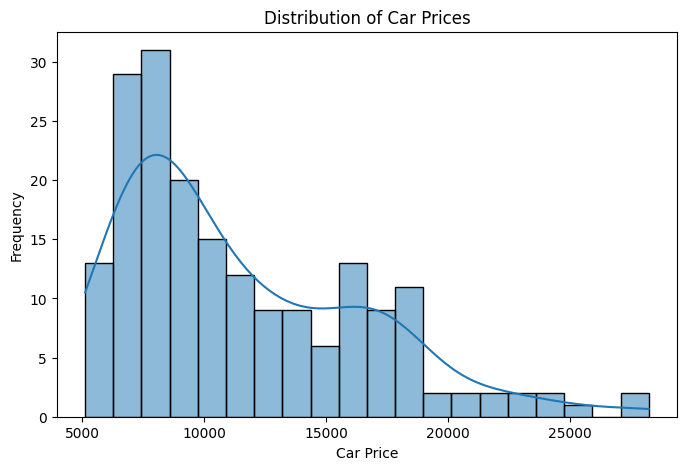

In [108]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=20, kde=True)
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()

<ipython-input-109-4d4a653d18b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price.index, y=brand_price.values, palette="viridis")


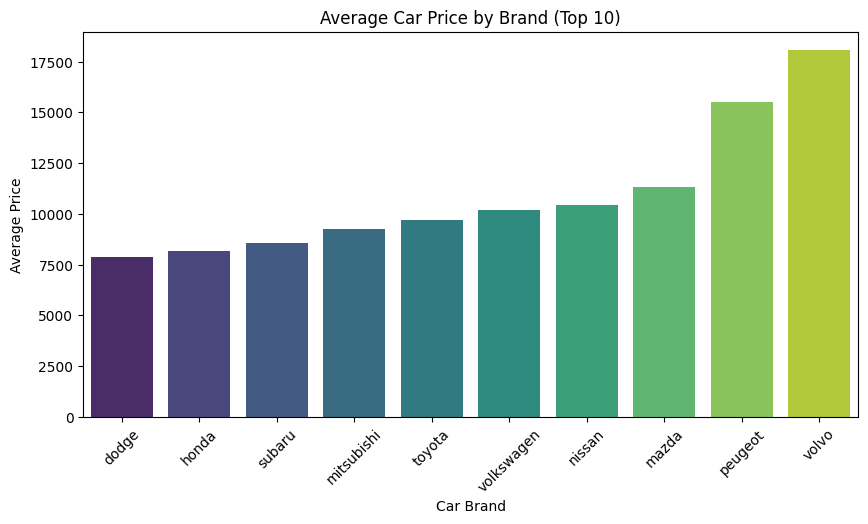

In [109]:
# Brand-wise pricing
top_brands = df['brand'].value_counts().nlargest(10).index
brand_price = df[df['brand'].isin(top_brands)].groupby('brand')['price'].mean().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=brand_price.index, y=brand_price.values, palette="viridis")
plt.xlabel("Car Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.title("Average Car Price by Brand (Top 10)")
plt.show()

In [110]:
# Analysis Function
def analyze_pricing_factors(df):
    # Check if required columns exist
    if 'city_mpg' not in df.columns:
        print("Error: 'city_mpg' column not found in dataset. Available columns:", df.columns)
        return

    # Relationship between mileage and price
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df['city_mpg'], y=df['price'])
    plt.xlabel("City Mileage (mpg)")
    plt.ylabel("Price")
    plt.title("Car Price vs. City Mileage")
    plt.show()